<a href="https://colab.research.google.com/github/Cuong2812/Weather-Prediction/blob/main/Weather_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Import

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
weather = pd.read_csv('/content/drive/MyDrive/hanoi weather.csv')
# weather = weather.iloc[:]
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4549 entries, 0 to 4548
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   province       4549 non-null   object 
 1   max temp       4549 non-null   int64  
 2   min temp       4549 non-null   int64  
 3   wind speed     4549 non-null   int64  
 4   weather        4549 non-null   object 
 5   weather label  4549 non-null   int64  
 6   rain amount    4549 non-null   float64
 7   humidity       4549 non-null   int64  
 8   cloud          4549 non-null   int64  
 9   pressure       4549 non-null   int64  
 10  date           4549 non-null   object 
 11  timestamp      4549 non-null   int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 426.6+ KB


In [58]:
df = weather.drop(columns=['province', 
                           'timestamp', 
                           'rain amount',
                           # 'weather label',
                           # 'weather'
                           ])
df.duplicated().sum() #Check Duplicated Rows

0

In [59]:
df['weather'].unique()

array(['Sunny', 'Light Rain', 'Moderate Rain', 'Heavy Rain',
       'Violent Rain'], dtype=object)

In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['weather label'] = le.fit_transform(df['weather'])

#Store labels and name for final use
weather_dict = dict(zip(df['weather label'], df['weather']))
weather_dict

{3: 'Sunny',
 1: 'Light Rain',
 2: 'Moderate Rain',
 0: 'Heavy Rain',
 4: 'Violent Rain'}

In [61]:
#Preprocess Datetime Columns

def date_time(df) :
    
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year #Generate Year Column
    df['month'] = df['date'].dt.month #Generate Month Column
    df['day'] = df['date'].dt.day
    
    return df


df_final = date_time(df)
df_final

,max temp,min temp,wind speed,weather,weather label,humidity,cloud,pressure,date,year,month,day
0,19,12,6,Sunny,3,70,44,1025,2009-01-01,2009,1,1
1,18,12,6,Light Rain,1,65,28,1025,2009-01-02,2009,1,2
2,20,13,5,Light Rain,1,74,40,1022,2009-01-03,2009,1,3
3,25,12,5,Sunny,3,81,46,1018,2009-01-04,2009,1,4
4,23,14,5,Light Rain,1,90,75,1017,2009-01-05,2009,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4544,32,25,10,Light Rain,1,74,60,1001,2021-06-14,2021,6,14
4545,34,26,6,Sunny,3,67,36,999,2021-06-15,2021,6,15
4546,37,29,7,Sunny,3,62,24,1000,2021-06-16,2021,6,16
4547,38,29,9,Sunny,3,65,28,1002,2021-06-17,2021,6,17


# Display

In [62]:
df_final = df_final.set_index('date').drop(['weather'],axis=1)
df_final

,max temp,min temp,wind speed,weather label,humidity,cloud,pressure,year,month,day
date,,,,,,,,,,
2009-01-01,19,12,6,3,70,44,1025,2009,1,1
2009-01-02,18,12,6,1,65,28,1025,2009,1,2
2009-01-03,20,13,5,1,74,40,1022,2009,1,3
2009-01-04,25,12,5,3,81,46,1018,2009,1,4
2009-01-05,23,14,5,1,90,75,1017,2009,1,5
...,...,...,...,...,...,...,...,...,...,...
2021-06-14,32,25,10,1,74,60,1001,2021,6,14
2021-06-15,34,26,6,3,67,36,999,2021,6,15
2021-06-16,37,29,7,3,62,24,1000,2021,6,16


# Pre-process

In [63]:
# Preprocess Data for Machine Learning Development
X = df_final.drop(['weather label'], axis = 1)
y = df_final['weather label']

In [64]:
y.value_counts()

1    1876
3    1151
2     943
0     563
4      16
Name: weather label, dtype: int64

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 10, test_size = 0.2)

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **CLASSIFICATION**

## Decision Tree

In [98]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42, criterion= 'entropy')
clf = clf.fit(X_train, y_train)

In [99]:
from sklearn.metrics import accuracy_score, classification_report

pred_test_DT = clf.predict(X_test)

print(f'Accuracy Score on Test Data : {round(accuracy_score(y_test, pred_test_DT),2)*100}')

Accuracy Score on Test Data : 60.0


In [100]:
from sklearn.tree import DecisionTreeClassifier
DT_clf = DecisionTreeClassifier(random_state=0)

from sklearn.model_selection import cross_val_score
DT_scores = cross_val_score(clf, X_train, y_train, cv=10)

In [101]:
DT_scores.mean()

0.5548247207338116

## Random Forest

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [97]:
# ntree = sqrt (number of row * number of columns)/numberofcpu
classifier = RandomForestClassifier(n_estimators = 128, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=128, random_state=42)

In [73]:
from sklearn.metrics import accuracy_score, classification_report
# pred_all_RF = classifier.predict(X)
# pred_train_RF = classifier.predict(X_train_scaled)
pred_test_RF = classifier.predict(X_test)

# print(f'Accuracy Score on All Data : {round(accuracy_score(y, pred_all_RF),2)*100}')
# print(f'Accuracy Score on Train Data : {round(accuracy_score(y_train, pred_train_RF),2)*100}')
print(f'Accuracy Score on Test Data : {round(accuracy_score(y_test, pred_test_RF),2)*100}')

Accuracy Score on Test Data : 66.0


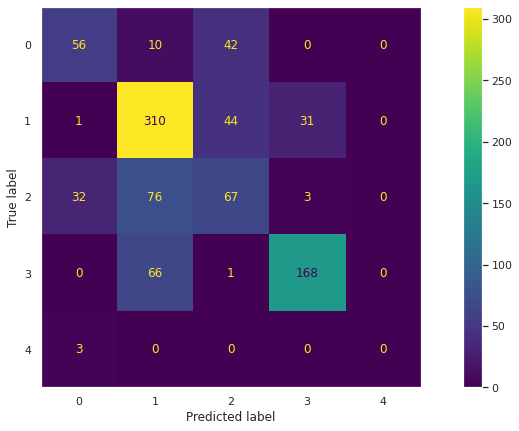

In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm1 = confusion_matrix(y_test, pred_test_RF)

disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=classifier.classes_)
disp = disp.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.grid(False)
plt.show()

In [75]:
TP = cm1[0,0]
TN = cm1[1,1]
FP = cm1[0,1]
FN = cm1[1,0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
print('Classification error : {0:0.4f}'.format(classification_error))

Classification accuracy : 0.9708
Classification error : 0.0292


## KNN

In [102]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [103]:
# pred_all_KNN = neigh.predict(X)
# pred_train_KNN = neigh.predict(X_train)
pred_test_KNN = neigh.predict(X_test)

# print(f'Accuracy Score on All Data : {round(accuracy_score(y, pred_all_KNN),2)*100}')
# print(f'Accuracy Score on Train Data : {round(accuracy_score(y_train, pred_train_KNN),2)*100}')
print(f'Accuracy Score on Test Data : {round(accuracy_score(y_test, pred_test_KNN),2)*100}')

Accuracy Score on Test Data : 59.0


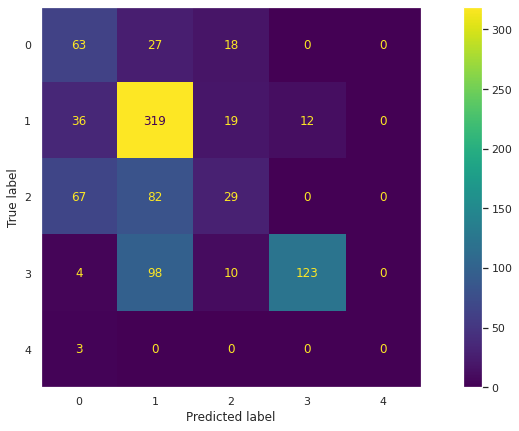

In [104]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm2 = confusion_matrix(y_test, pred_test_KNN)

disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=neigh.classes_)
disp = disp.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.grid(False)
plt.show()

In [105]:
print(classification_report(y_test,pred_test_KNN))

              precision    recall  f1-score   support

           0       0.36      0.58      0.45       108
           1       0.61      0.83      0.70       386
           2       0.38      0.16      0.23       178
           3       0.91      0.52      0.66       235
           4       0.00      0.00      0.00         3

    accuracy                           0.59       910
   macro avg       0.45      0.42      0.41       910
weighted avg       0.61      0.59      0.57       910



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [106]:
TP = cm2[0,0]
TN = cm2[1,1]
FP = cm2[0,1]
FN = cm2[1,0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
print('Classification error : {0:0.4f}'.format(classification_error))

Classification accuracy : 0.8584
Classification error : 0.1416


## Neural Network

In [81]:
import keras
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam

In [82]:
X_train_array = np.array(X_train_scaled)
X_test_array = np.array(X_test_scaled)
y_train_array = np.array(y_train)
y_test_array = np.array(y_test)

In [83]:
Y_train = to_categorical(y_train_array)
Y_test = to_categorical(y_test_array)

### [Determining Hidden Layers and Hidden Neurons ](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8459779/#:~:text=The%20neuron%20number%20%3D%20N%20%E2%88%92%201,N%20%3D%20the%20input%20feature%20number%20.&text=The%20neuron%20number%20of%20the,the%20number%20of%20input%20feature%20.)

[idfk](https://www.kaggle.com/questions-and-answers/142430)

In [84]:
from sklearn.decomposition import PCA
#idfk
pca = PCA(n_components=6)
pc_X = pca.fit_transform(X_scaled)
pc_X = ['pc1','pc2','pc3','pc4','pc5','pc6']
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[2.95685367 1.70006658 1.49281946 1.00324995 0.9389084  0.49987228]
[0.32846707 0.18885476 0.16583237 0.11144771 0.10430022 0.05552916]


In [85]:
from sklearn.cluster import KMeans
#try to find optimal k using the elbow method
wcss = []
for i in range(1,21):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=12, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
print(wcss)

[40941.0, 31340.30603549313, 27430.52798405457, 24676.75057775766, 22388.129435920382, 20838.422304377746, 19692.319299748335, 18643.88446466528, 17872.399572309347, 17268.904943690628, 16732.46372407872, 16209.348741592554, 15754.016391496898, 15346.937180851412, 14914.191784080953, 14532.476118167535, 14200.82873952594, 13832.901705751083, 13594.637797498253, 13310.216385555392]


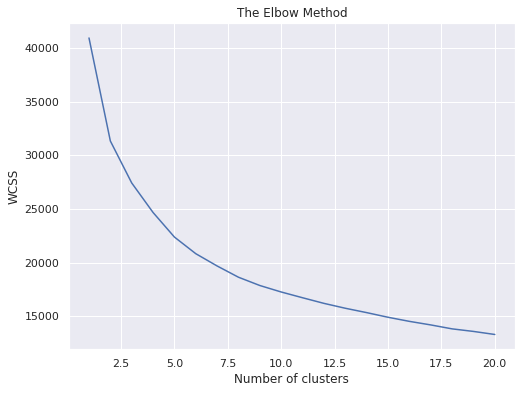

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline
f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,21),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Train

In [87]:
from keras.initializers import glorot_uniform
from sklearn.utils import class_weight
from keras import optimizers
"""
model = Sequential()
model.add(Dense(9, input_dim = dim, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(5, activation = 'softmax'))
"""

"""
model = Sequential()
model.add(Dense(16, input_shape=(dim,)))
model.add(Activation('sigmoid'))
model.add(Dense(5))
model.add(Activation('softmax'))
"""
"""
initializer = keras.initializers.GlorotUniform()

model = Sequential()
model.add(Dense(9, input_dim = dim, kernel_initializer=initializer))
model.add(Dense(11, activation = "relu"))
model.add(Dense(11, activation = "relu"))
model.add(Dense(11, activation = "relu"))
model.add(Dense(11, activation = "relu"))
model.add(Dense(5, activation = "softmax"))
model.compile(Adam(lr = 0.01), "categorical_crossentropy", metrics = ["accuracy"])
model.summary()
"""

# Define the number of classes
num_classes = 5

# Define the input dimension
dim = len(X.columns)

# Create a sequential model
model = Sequential()

# Add the input layer
model.add(Dense(32, input_dim=dim, activation='relu'))

# Add a hidden layer
model.add(Dense(64, activation='relu'))

# Add the output layer
model.add(Dense(num_classes, activation='softmax'))

# Compile the model with categorical cross-entropy loss and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [88]:
early_stopper = EarlyStopping(monitor="accuracy", patience=5, restore_best_weights=False)
cbs = [early_stopper]

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
hist = model.fit(X_train_array, Y_train, epochs = 100, batch_size = 1, verbose=1, callbacks=cbs)

scores = model.evaluate(X_test_array, Y_test)

for i, m in enumerate(model.metrics_names):
    print("\n%s: %.3f"% (m, scores[i]))

Epoch 1/100
3639/3639 [==============================] - 6s 2ms/step - loss: 0.9422 - accuracy: 0.5991
Epoch 2/100
3639/3639 [==============================] - 7s 2ms/step - loss: 0.8325 - accuracy: 0.6320
Epoch 3/100
3639/3639 [==============================] - 6s 2ms/step - loss: 0.8067 - accuracy: 0.6444
Epoch 4/100
3639/3639 [==============================] - 6s 2ms/step - loss: 0.7907 - accuracy: 0.6516
Epoch 5/100
3639/3639 [==============================] - 7s 2ms/step - loss: 0.7816 - accuracy: 0.6367
Epoch 6/100
3639/3639 [==============================] - 6s 2ms/step - loss: 0.7719 - accuracy: 0.6587
Epoch 7/100
3639/3639 [==============================] - 7s 2ms/step - loss: 0.7643 - accuracy: 0.6584
Epoch 8/100
3639/3639 [==============================] - 6s 2ms/step - loss: 0.7603 - accuracy: 0.6581
Epoch 9/100
3639/3639 [==============================] - 6s 2ms/step - loss: 0.7563 - accuracy: 0.6628
Epoch 10/100
3639/3639 [==============================] - 8s 2ms/step - l

In [89]:
# pred_test_NN = np.array(scores.loc[:,2])
# pred_test_NN
scores = np.array(scores)
pred_test_NN = np.array(scores[1])
pred_test_NN

array(0.63736266)

In [90]:
print(f'Accuracy Score on Test Data : {np.round(pred_test_NN,2)*100}')

Accuracy Score on Test Data : 64.0


## Plot Results

<Axes: >

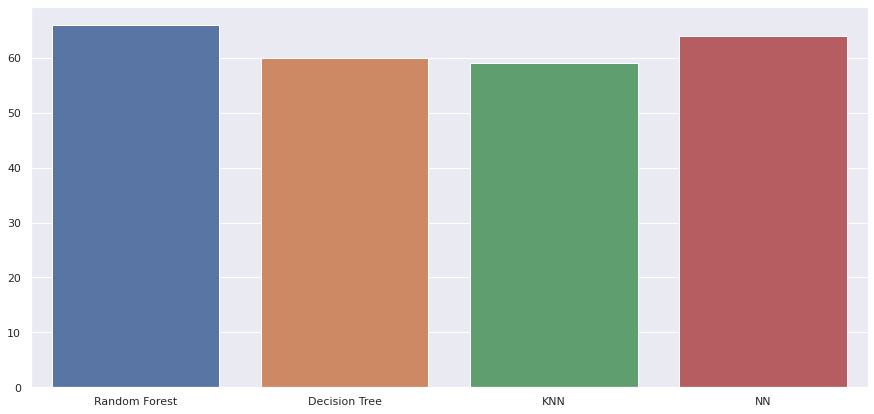

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(15,7)})

#acc_NB = round(accuracy_score(y_test, pred_test_NB),2)*100
acc_RF = round(accuracy_score(y_test, pred_test_RF),2)*100
acc_DT = round(accuracy_score(y_test, pred_test_DT),2)*100
#acc_XGB = round(accuracy_score(y_test, pred_test_XGB),2)*100
acc_KNN = round(accuracy_score(y_test, pred_test_KNN),2)*100
#acc_Log = round(accuracy_score(y_test, pred_test_Log),2)*100
#acc_SV = round(accuracy_score(y_test, pred_test_sv),2)*100
acc_NN = np.round(pred_test_NN,2)*100


models_scores = [#acc_NB, 
                 acc_RF, acc_DT, 
                 #acc_XGB, 
                 acc_KNN,
                 #acc_Log, acc_SV, 
                 acc_NN
                 ]
models = [#'Naive Bayes', 
          'Random Forest', 'Decision Tree', 
          #'XGB', 
          'KNN',
          #'Log Regr', 'SV', 
          'NN'
          ]

sns.barplot(x=models, y=models_scores)

In [92]:
present_weather = { 'max temp':23, 
                    'min temp': 18, 
                    'wind speed':5, 
                    'humidity':59, 
                    'cloud':62,
                    'pressure':1020, 
                    'year':2023, 
                    'month':3, 
                    'day':1
                    }
present_df = pd.DataFrame(present_weather, index = ['2023-03-01'])
# using inputs to predict the output
prediction1 = clf.predict(present_df)
prediction2 = classifier.predict(present_df)
prediction3 = neigh.predict(present_df)
prediction4 = model.predict(present_df)
print(prediction1)
print(prediction2)
print(prediction3)
print(prediction4)

1/1 [==============================] - 0s 68ms/step
[1]
[3]
[3]
[[0. 1. 0. 0. 0.]]
